## What do your blood sugars tell you? ##
### 📖 Background  ###

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.

### 💾 The data ###
The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

Pregnancies Type: Numerical (Continuous) Description: Number of times the patient has been pregnant.

Glucose Type: Numerical (Continuous) Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

BloodPressure Type: Numerical (Continuous) Description: Diastolic blood pressure (mm Hg).

SkinThickness Type: Numerical (Continuous) Description: Triceps skinfold thickness (mm).

Insulin Type: Numerical (Continuous) Description: 2-Hour serum insulin (mu U/ml).

BMI Type: Numerical (Continuous) Description: Body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction Type: Numerical (Continuous) Description: A function that represents the likelihood of diabetes based on family history.

Age Type: Numerical (Continuous) Description: Age of the patient in years.

Outcome Type: Categorical (Binary) Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

https://www.datacamp.com/datalab/w/ec15534e-5f86-4e6b-a059-7f3d0fbf758b#what-do-your-blood-sugars-tell-you

### 📚 Business Questions ### 
We are posed with some challenges about this data, you will focus on the following key tasks:

1) Determine the most important factors affecting the diabetes outcome.  
2) Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.  
3) What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?  

In [12]:
# import initial packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os
os.getcwd()

'c:\\Users\\Alexander\\Documents\\data_science_projects\\diabetes_dataset'

#### 🧹 Data Cleaning and Prep ####

In [13]:
# import data
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# checking data types and missing info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# checking summary statistics of each column
diabetes.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In the above summaries, we notice a couple of issues with the data. BMI, insulin, skin thickness, blood pressure and glucose all have minimum values of 0. That cannot be possible, as its likely the person is not alive if these are their values. We are not sure what caused these issues but we will remove all patients records with 0 for these variables.

In [16]:
# drop rows with 0 for the above variables
dia_df = diabetes[(diabetes['Glucose'] != 0) &
                  (diabetes['BloodPressure'] != 0) &
                  (diabetes['SkinThickness'] != 0) &
                  (diabetes['Insulin'] != 0) &
                  (diabetes['BMI'] != 0)]

# check the min values again
dia_df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,3.30,122.63,70.66,29.15,156.06,33.09,0.52,30.86,0.33
std,3.21,30.86,12.50,10.52,118.84,7.03,0.35,10.20,0.47
min,0.00,56.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,62.00,21.00,76.75,28.40,0.27,23.00,0.00
50%,2.00,119.00,70.00,29.00,125.50,33.20,0.45,27.00,0.00
75%,5.00,143.00,78.00,37.00,190.00,37.10,0.69,36.00,1.00
max,17.00,198.00,110.00,63.00,846.00,67.10,2.42,81.00,1.00


The data now looks a lot better. The values are no longer going to be skewed by the 0 values. However, we unfortunately lost close to half of our data.  

Let's also take a look at our outcome variable, since it will be important for our modelling. Ensure it is binary and see the balance of the variable.

In [17]:
# group and count by outcome
dia_df.groupby('Outcome')['Outcome'].count()

Outcome
0    262
1    130
Name: Outcome, dtype: int64

#### 📊 Exploratory Data Analysis ####

We will display the distribution of each variable and check for normality. If so, we can adjust the variables to become normally distributed.

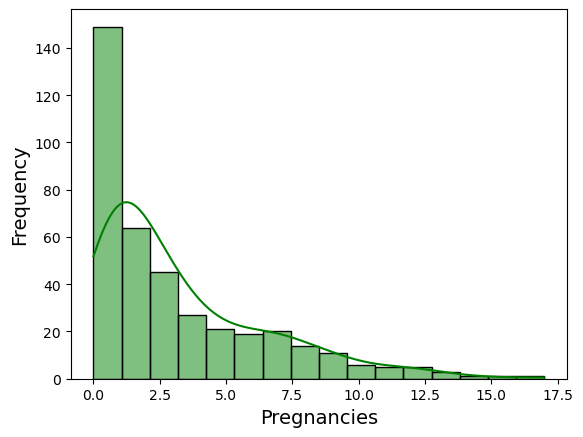

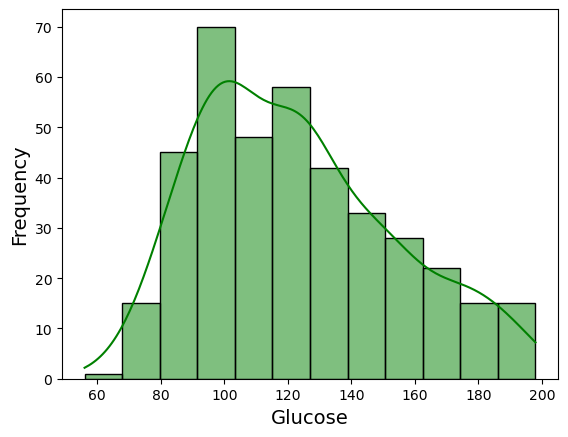

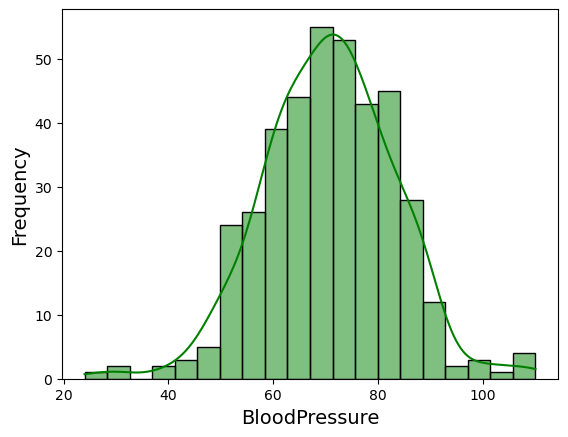

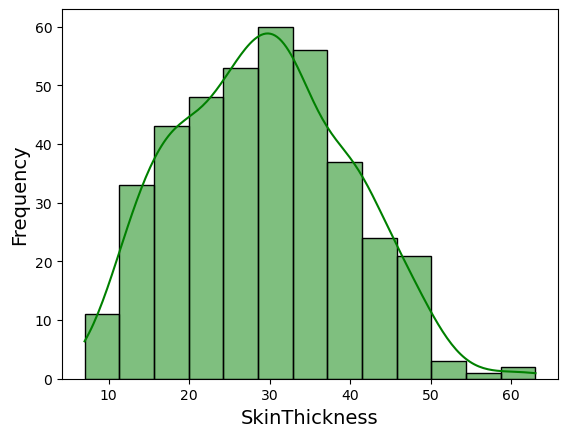

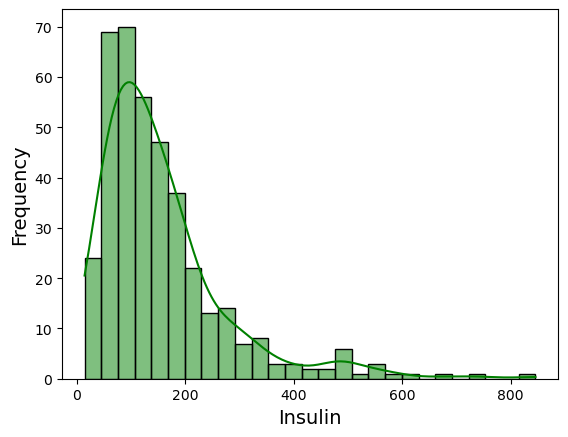

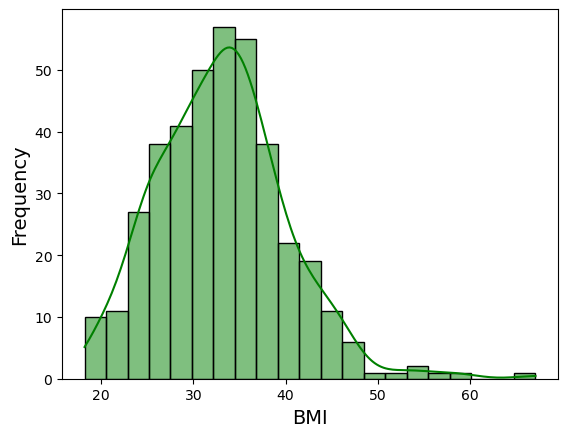

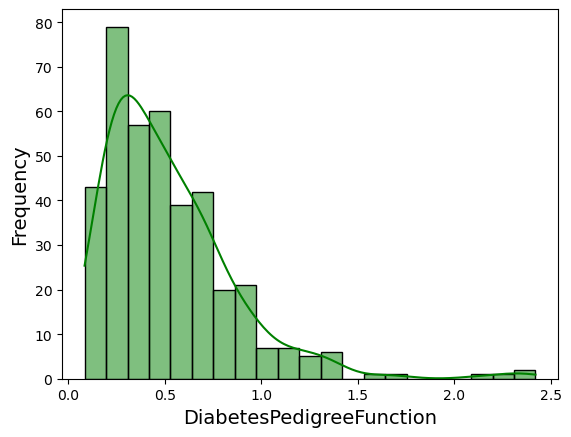

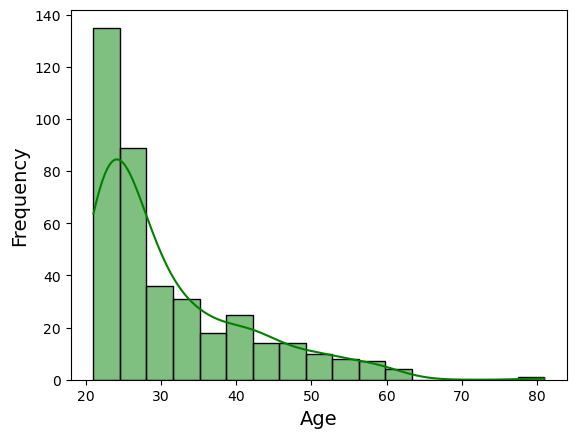

In [18]:
# create hist plots for each variable
explanatory = dia_df.drop(columns='Outcome')

for i in explanatory.columns:
    sns.histplot(explanatory, x=i, kde=True, color='green', edgecolor='black')
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()


A few of our variables are noticeably skewed. Pregnancies, Insulin, DiabetesPedigreeFunction and Age are rightward skewed. We can apply a Quantile transformation in our pipeline to get normalized data. QuantileTransformer with output set to normal should achieve this for us. The rest of the variables will have standard scaler.   

These transformations will be included in the next section, which will target the first business requirement of finding the most import factors affecting the diabetic outcome.

### 📏 Important Features ###  

1) Determine the most important factors affecting the diabetes outcome.  

In [19]:
# import packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [20]:
# lets split our data before we start to run through this data
X = dia_df.drop(columns=['Outcome'])
y = dia_df[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# set variables based on their pipeline transformation
normal_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
non_cols = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

In [22]:
# create our pipelines
# pipeline for the already normal variables
standard = Pipeline([
    ('robust_normal', StandardScaler()) # standard scaler for the normal variables
])

# pipeline for the non normal variables that need to be transformed
norm_transform = Pipeline([
    ('non_normal_quantile', QuantileTransformer(output_distribution='normal')) # transform lognormals to normal
])

# piece together into the largr column transformer pipeline
column_transform = ColumnTransformer([
    ('normal_transforms', standard, normal_cols),
    ('non-normal_transforms', norm_transform, non_cols)
])

# see the pipeline
column_transform

ColumnTransformer(transformers=[('normal_transforms',
                                 Pipeline(steps=[('robust_normal',
                                                  StandardScaler())]),
                                 ['Glucose', 'BloodPressure', 'SkinThickness',
                                  'BMI']),
                                ('non-normal_transforms',
                                 Pipeline(steps=[('non_normal_quantile',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 ['Pregnancies', 'Insulin',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [23]:
# random forest classifier pipeline
forest_classifier = Pipeline([
    ('preprocessing', column_transform),
    ('forest_classifier', RandomForestClassifier())
])

forest_classifier

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_transforms',
                                                  Pipeline(steps=[('robust_normal',
                                                                   StandardScaler())]),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'BMI']),
                                                 ('non-normal_transforms',
                                                  Pipeline(steps=[('non_normal_quantile',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Pregnancies', 'Insulin',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('forest_classifier', RandomForestClassifier())])

In [24]:
# import the grid search 
from sklearn.model_selection import GridSearchCV

# this will help us identify parameters to tune
forest_classifier.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('normal_transforms',
                                    Pipeline(steps=[('robust_normal',
                                                     StandardScaler())]),
                                    ['Glucose', 'BloodPressure', 'SkinThickness',
                                     'BMI']),
                                   ('non-normal_transforms',
                                    Pipeline(steps=[('non_normal_quantile',
                                                     QuantileTransformer(output_distribution='normal'))]),
                                    ['Pregnancies', 'Insulin',
                                     'DiabetesPedigreeFunction', 'Age'])])),
  ('forest_classifier', RandomForestClassifier())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('normal_transforms',
                                  Pipeline(steps=[('robust_normal',
                              

In [25]:
# let's select the hyper parameter values to tune around
hyper_rfc = {
    'forest_classifier__criterion' : ['gini', 'log_loss'],
    'forest_classifier__max_depth': np.arange(1,11),
    'forest_classifier__min_samples_leaf': np.arange(1,11)
}

# set scoring values
scoring = ['neg_log_loss', 'roc_auc', 'f1', 'accuracy', 'precision', 'recall']

In [26]:
# grid search the data
grid_cv = GridSearchCV(
    estimator = forest_classifier,
    param_grid = hyper_rfc,
    scoring = scoring,
    cv = 5,
    refit = 'neg_log_loss'
)

grid_cv.fit(X_train, y_train)

c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('normal_transforms',
                                                                         Pipeline(steps=[('robust_normal',
                                                                                          StandardScaler())]),
                                                                         ['Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'BMI']),
                                                                        ('non-normal_transforms',
                                                                         Pipeline(steps=[('non_normal_quantile',
                                                                                          QuantileTransformer(output_distribution='normal'))]),
                                                                         ['Pregnancies',...
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age'])])),
                                       ('forest_classifier',
                                        RandomForestClassifier())]),
             param_grid={'forest_classifier__criterion': ['gini', 'log_loss'],
                         'forest_classifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'forest_classifier__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             refit='neg_log_loss',
             scoring=['neg_log_loss', 'roc_auc', 'f1', 'accuracy', 'precision',
                      'recall'])

In [27]:
# check the results
results = grid_cv.cv_results_
results = pd.DataFrame(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest_classifier__criterion,param_forest_classifier__max_depth,param_forest_classifier__min_samples_leaf,params,split0_test_neg_log_loss,split1_test_neg_log_loss,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.292605,0.046451,0.096680,0.008532,gini,1,1,"{'forest_classifier__criterion': 'gini', 'fore...",-0.548730,-0.547527,...,0.200000,25,0.238095,0.142857,0.333333,0.10,0.25,0.212857,0.082665,183
1,0.230804,0.019990,0.088065,0.011261,gini,1,2,"{'forest_classifier__criterion': 'gini', 'fore...",-0.548420,-0.555460,...,0.185592,5,0.238095,0.142857,0.238095,0.05,0.25,0.183810,0.077275,191
2,0.246308,0.021141,0.099886,0.021243,gini,1,3,"{'forest_classifier__criterion': 'gini', 'fore...",-0.548081,-0.541352,...,0.173051,10,0.190476,0.190476,0.190476,0.10,0.35,0.204286,0.080846,185
3,0.253989,0.034006,0.091844,0.010257,gini,1,4,"{'forest_classifier__criterion': 'gini', 'fore...",-0.547612,-0.551103,...,0.152789,4,0.238095,0.190476,0.238095,0.35,0.25,0.253333,0.052480,181
4,0.229335,0.013879,0.090136,0.005944,gini,1,5,"{'forest_classifier__criterion': 'gini', 'fore...",-0.536831,-0.543099,...,0.174005,2,0.238095,0.238095,0.238095,0.10,0.25,0.212857,0.056617,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.373658,0.073293,0.125788,0.030138,log_loss,10,6,"{'forest_classifier__criterion': 'log_loss', '...",-0.495434,-0.475051,...,0.095239,104,0.571429,0.428571,0.523810,0.75,0.60,0.574762,0.105190,28
196,0.376636,0.056453,0.127119,0.008270,log_loss,10,7,"{'forest_classifier__criterion': 'log_loss', '...",-0.516291,-0.454726,...,0.072966,181,0.476190,0.476190,0.523810,0.75,0.65,0.575238,0.108071,26
197,0.306393,0.044214,0.089620,0.015424,log_loss,10,8,"{'forest_classifier__criterion': 'log_loss', '...",-0.509988,-0.467022,...,0.124584,132,0.523810,0.428571,0.523810,0.75,0.65,0.575238,0.112189,26
198,0.257565,0.019810,0.093014,0.004156,log_loss,10,9,"{'forest_classifier__criterion': 'log_loss', '...",-0.510074,-0.455085,...,0.109231,85,0.428571,0.476190,0.523810,0.70,0.60,0.545714,0.095694,104


In [28]:
# best parameters to use for our model
print(grid_cv.best_params_)
print(grid_cv.best_score_)

# create variables out of these tuned parameters
x1 = pd.DataFrame(grid_cv.best_params_, index=[0])
criterion = x1['forest_classifier__criterion'].iloc[0]
max_depth = x1['forest_classifier__max_depth'].iloc[0]
min_samples_leaf = x1['forest_classifier__min_samples_leaf'].iloc[0]

{'forest_classifier__criterion': 'log_loss', 'forest_classifier__max_depth': 5, 'forest_classifier__min_samples_leaf': 5}
-0.45143020986371807


In [29]:
# random forest classifier pipeline - updated with hyper parameters
tuned_forest_classifier = Pipeline([
    ('preprocessing', column_transform),
    ('forest_classifier', RandomForestClassifier(criterion= criterion, max_depth= max_depth, min_samples_leaf= min_samples_leaf))
])

tuned_forest_classifier.fit(X_train, y_train)

c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (313). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_transforms',
                                                  Pipeline(steps=[('robust_normal',
                                                                   StandardScaler())]),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'BMI']),
                                                 ('non-normal_transforms',
                                                  Pipeline(steps=[('non_normal_quantile',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Pregnancies', 'Insulin',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('forest_classifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=5,
                                        min_samples_leaf=5))])

In [30]:
# import the scoring metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [31]:
# now predict the variables
y_pred = tuned_forest_classifier.predict(X_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred), 4))
print('Recall: ', round(recall_score(y_test, y_pred), 4))
print('Precision: ', round(precision_score(y_test, y_pred), 4))

print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7595
Recall:  0.5185
Precision:  0.7
[[46  6]
 [13 14]]


In [32]:
# let's set up the model to build our image
x1 = dia_df.reset_index()
x1 = x1[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']]
x2 = dia_df.reset_index()
x2 = x2[['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age']]

tform_normal = StandardScaler()
tform_non_normal = QuantileTransformer(output_distribution='normal')

metrics_normal = pd.DataFrame(tform_normal.fit_transform(x1), columns=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI'])
metrics_normal

metrics_non_normal = pd.DataFrame(tform_non_normal.fit_transform(x2), columns=['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age'])
metrics_non_normal

df = pd.merge(metrics_normal, metrics_non_normal, left_on=metrics_normal.index, right_on=metrics_non_normal.index)
df

c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (392). n_quantiles is set to n_samples.
  warnings.warn(


,key_0,Glucose,BloodPressure,SkinThickness,BMI,Pregnancies,Insulin,DiabetesPedigreeFunction,Age
0,0,-1.091046,-0.373655,-0.585110,-0.710421,-0.640667,-0.422535,-1.376076,-5.199338
1,1,0.466314,-2.456964,0.557421,1.426730,-5.199338,0.450744,2.567950,0.504641
2,2,-1.447941,-1.655691,0.271788,-0.297238,0.252685,-0.515594,-0.880633,-0.125338
3,3,2.413014,-0.053146,1.509530,-0.368477,-0.096311,2.161062,-1.564726,1.684570
4,4,2.153454,-0.854419,-0.585110,-0.425468,-0.640667,5.199338,-0.190261,2.232598
...,...,...,...,...,...,...,...,...,...
387,387,1.893894,1.389146,1.414319,1.455225,-5.199338,2.044332,-1.077337,-0.125338
388,388,0.174309,1.389146,0.938264,0.486384,-0.640667,-0.190261,1.502406,0.738257
389,389,-1.123491,-1.014673,-0.299477,-0.667678,-0.096311,-2.567950,0.938814,-1.094679
390,390,-0.701706,0.427618,1.795162,-0.026533,1.658648,0.560047,-1.343753,2.799695


c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0, 0.5, 'Feature')

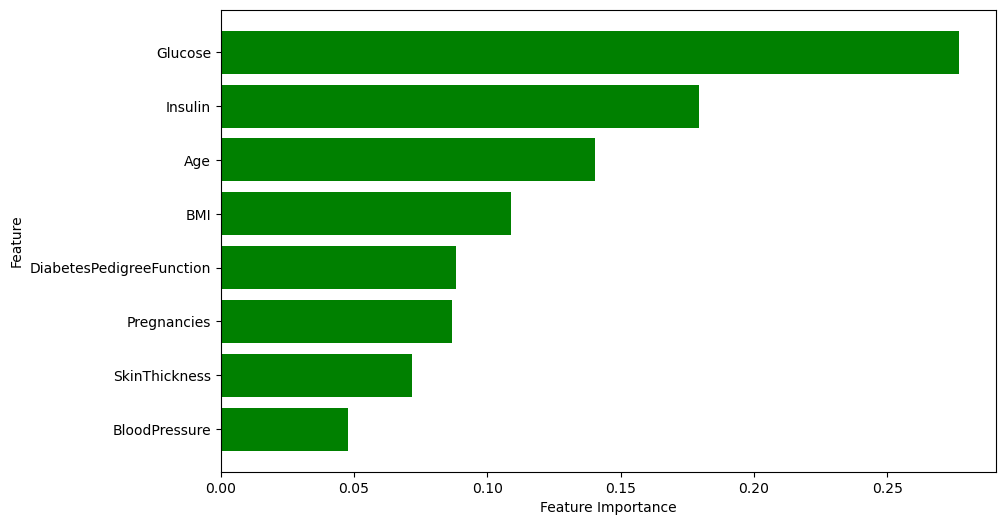

In [33]:
# create new x and y vars for this
x0 = df.drop(columns=['key_0'])
y0 = dia_df[['Outcome']].reset_index().drop(columns=['index'])

# creating the model for the transformed data
model = RandomForestClassifier(criterion= criterion, max_depth= max_depth, min_samples_leaf= min_samples_leaf)
model.fit(x0, y0)

feature_importances = model.feature_importances_
features = x0.columns

features_df = pd.DataFrame({
    'Feature':features,
    'Importance_value': feature_importances
}).sort_values(by='Importance_value', ascending=True)

# set the important feature and imp feature value to variables
imp_feat = features_df['Feature'].iloc[-1]
imp_feat_val = features_df['Importance_value'].iloc[-1]



# create the feature importance plot
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(features_df['Feature'], features_df['Importance_value'], color='green')

# label axes
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')


In [34]:
print(f'The most important feature in the data set is {imp_feat}, with a value of {imp_feat_val}')

The most important feature in the data set is Glucose, with a value of 0.2767653763844262


### 📊 Interactive Plot ###

2) Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.  

In [39]:
# import plotly packages
import plotly.express as px

In [40]:
# create mapping objects for visuals
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [37]:
# create list of columns for scatter plots
histg = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [54]:
# glucose boxplot
fig_g = px.box(dia_df, y='Glucose', color='Outcome', 
               title='Diabetes Outcome vs. Glucose',
               labels = {"Outcome":"Diabetes Outcome"})
fig_g.show()

# blood pressure boxplot
fig_bp = px.box(dia_df, y='BloodPressure', color='Outcome',
                title='Diabetes Outcome vs. Blood Pressure',
                labels = {'Outcome':'Diabetes Outcome', 'BloodPressure':"Blood Pressure"})
fig_bp.show()

# SkinThickness boxplot
fig_st = px.box(dia_df, y='SkinThickness', color='Outcome',
                title='Diabetes Outcome vs. Skin Thickness',
                labels = {'Outcome':'Diabetes Outcome', 'SkinThickness':"Skin Thickness"})
fig_st.show()

# Insulin boxplot
fig_i = px.box(dia_df, y='Insulin', color='Outcome',
                title='Diabetes Outcome vs. Insulin',
                labels = {'Outcome':'Diabetes Outcome'})
fig_i.show()

# BMI boxplot
fig_bmi = px.box(dia_df, y='BMI', color='Outcome',
                title='Diabetes Outcome vs. Body Mass Index',
                labels = {'Outcome':'Diabetes Outcome', 'BMI':"Body Mass Index"})
fig_bmi.show()

# DiabetesPedigreeFunction boxplot
fig_dpf = px.box(dia_df, y='DiabetesPedigreeFunction', color='Outcome',
                title='Diabetes Outcome vs. Diabetes Pedigree Function',
                labels = {'Outcome':'Diabetes Outcome', 'DiabetesPedigreeFunction':"Diabetes Pedigree Function"})
fig_dpf.show()

# Age boxplot
fig_age = px.box(dia_df, y='Age', color='Outcome',
                title='Diabetes Outcome vs. Age',
                labels = {'Outcome':'Diabetes Outcome'})
fig_age.show()


### 🔎 Case Patient ###

3) What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?  

Given we are provided some of the data on this patient, we will need to determine what the remaining characteristics are as well. 

In [56]:
tuned_forest_classifier

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_transforms',
                                                  Pipeline(steps=[('robust_normal',
                                                                   StandardScaler())]),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'BMI']),
                                                 ('non-normal_transforms',
                                                  Pipeline(steps=[('non_normal_quantile',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['Pregnancies', 'Insulin',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('forest_classifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=5,
                                        min_samples_leaf=5))])

In [ ]:
age = 54
bmi = 96 / (1.78**2)
glucose = 125
pregnancies = dia_df['Pregnancies'].mean()
